In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('dataset.csv',delimiter=';')
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
newdf = df.copy()

In [4]:
for x in df.columns:
    print(df[x].value_counts())

1      1
131    1
122    1
123    1
124    1
      ..
66     1
67     1
68     1
69     1
189    1
Name: ID, Length: 189, dtype: int64
S52    109
A1      80
Name: Motorway, dtype: int64
300      47
200      11
1000     10
500       8
100       8
         ..
1300      1
10050     1
16000     1
5000      1
22000     1
Name: SR, Length: 66, dtype: int64
1     148
2      20
3       7
4       4
6       3
5       3
7       1
9       1
10      1
12      1
Name: NR, dtype: int64
1     116
12     23
15     19
5      12
14     10
11      4
2       4
7       1
Name: TR, dtype: int64
1    55
3    41
2    35
0    30
4    28
Name: VR, dtype: int64
2     70
1     43
10    30
7     20
6     19
9      5
14     1
4      1
Name: SUR1, dtype: int64
10    44
2     41
6     39
1     36
7     18
9     10
11     1
Name: SUR2, dtype: int64
6     55
10    45
2     29
1     29
7     18
9     10
5      2
11     1
Name: SUR3, dtype: int64
0    130
3     50
1      9
Name: UR, dtype: int64
0    125
3     18
1     16

In [32]:
df.head()
df1 = df.iloc[0:190, 16:]
df1

,GreenFrogs,BrownFrogs,CommonToad,FireBelliedToad,TreeFrog,CommonNewt,GreatCrestedNewt
1,0,0,0,0,0,0,0
2,0,1,1,0,0,1,0
3,0,1,1,0,0,1,0
4,0,0,1,0,0,0,0
5,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...
185,0,1,0,0,0,0,0
186,1,1,1,1,0,1,0
187,1,1,1,1,0,1,0
188,0,1,1,0,0,0,0


In [33]:
df2 = newdf.iloc[0:190, 0: 16]
df2

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
1,1,A1,600,1,1,4,6,2,10,0,0,50,0,0,0,1
2,2,A1,700,1,5,1,10,6,10,3,1,75,1,1,0,1
3,3,A1,200,1,5,1,10,6,10,3,4,75,1,1,0,1
4,4,A1,300,1,5,0,6,10,2,3,4,25,0,0,0,1
5,5,A1,600,2,1,4,10,2,6,0,0,99,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185,S52,2300,1,12,3,2,2,1,0,0,75,2,1,0,1
186,186,S52,300,1,14,2,7,10,2,0,0,100,5,5,0,1
187,187,S52,500,1,1,4,1,10,2,0,0,100,5,5,0,1
188,188,S52,300,1,12,3,2,1,6,0,0,100,1,0,0,1


In [34]:
numerical_variables = ['ID','SR','NR','Motorway']
categorical_variables = list(set(df.columns)-set(numerical_variables))

In [35]:
df2[categorical_variables] = df[categorical_variables].astype('int')

In [36]:

df2['TR'].replace({1:'natural reservoirs', 2:'recently formed', 5:'technological',
                   7:'garden',11:'trenches', 12:'wet meadows', 14:'river valleys',
                   15:'small watercourses'}, inplace=True)
df2['VR'].replace({0:'no vegetation', 1:'patches at the edges', 2:'heavily overgrown',
                   3:'some part devoid of vegetation',4:'reservoirs completely overgrown'},\
                  inplace=True)
for i in ['SUR1','SUR2','SUR3']:
    df2[i].replace({1:'forest areas', 2:'meadows', 4:'gardens',
                   6:'industrial areas',10:'river valleys', 7:'orchards', 9:'roads',
                   14:'agricultural'}, inplace=True)
df2['UR'].replace({0:'unused', 1:'scenic', 3:'technological'}, inplace=True)
df2['FR'].replace({0:'lack', 1:'intense fishing', 2:'breeding reservoirs',\
                   3:'remove',4:'remove'}, inplace=True)
df2['OR'].replace({25:'poor access', 50:'low access', 75:'medium access',100:'large access',\
                   99:'remove',80:'remove'}, inplace=True)
df2['RR'].replace({0:'<50 m', 1:'50-100 m', 2:'100-200 m',5:'200-500 m',9:'500-1000 m',\
                   10:'>10000'}, inplace=True)
df2['BR'].replace({0:'<50 m', 1:'50-100 m', 2:'100-200 m',5:'200-500 m',9:'500-1000 m',\
                   10:'>10000'}, inplace=True)
df2['MR'].replace({0:'Clean', 1:'slightly littered', 2:'heavily littered'}, inplace=True)
df2['CR'].replace({1:'Natural', 2:'Concrete'}, inplace=True)

In [37]:
df2 = df2.iloc[0:190, 0:16]
df2

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
1,1,A1,600,1,natural reservoirs,reservoirs completely overgrown,industrial areas,meadows,river valleys,unused,lack,low access,<50 m,<50 m,Clean,Natural
2,2,A1,700,1,technological,patches at the edges,river valleys,industrial areas,river valleys,technological,intense fishing,medium access,50-100 m,50-100 m,Clean,Natural
3,3,A1,200,1,technological,patches at the edges,river valleys,industrial areas,river valleys,technological,remove,medium access,50-100 m,50-100 m,Clean,Natural
4,4,A1,300,1,technological,no vegetation,industrial areas,river valleys,meadows,technological,remove,poor access,<50 m,<50 m,Clean,Natural
5,5,A1,600,2,natural reservoirs,reservoirs completely overgrown,river valleys,meadows,industrial areas,unused,lack,remove,<50 m,200-500 m,Clean,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185,S52,2300,1,wet meadows,some part devoid of vegetation,meadows,meadows,forest areas,unused,lack,medium access,100-200 m,50-100 m,Clean,Natural
186,186,S52,300,1,river valleys,heavily overgrown,orchards,river valleys,meadows,unused,lack,large access,200-500 m,200-500 m,Clean,Natural
187,187,S52,500,1,natural reservoirs,reservoirs completely overgrown,forest areas,river valleys,meadows,unused,lack,large access,200-500 m,200-500 m,Clean,Natural
188,188,S52,300,1,wet meadows,some part devoid of vegetation,meadows,forest areas,industrial areas,unused,lack,large access,50-100 m,<50 m,Clean,Natural


1) ID â€“ vector ID (not used in the calculations)
2) MV â€“ motorway (not used in the calculations)
3) SR -> Surface of water reservoir numeric [m2]
4) NR -> Number of water reservoirs in habitat - Comment: The larger the number of reservoirs, the more likely it is that some of them will be suitable for amphibian breeding.

REMOVE NR values and fill them depending on range of SR using countplot or vice versa using boxplot(violinplot use should be rewarded)

5) TR -> Type of water reservoirs:
a. reservoirs with natural features that are natural or anthropogenic water reservoirs (e.g., subsidence post-exploited water reservoirs), not subjected to naturalization
b. recently formed reservoirs, not subjected to naturalization
c. settling ponds
d. water reservoirs located near houses
e. technological water reservoirs
f. water reservoirs in allotment gardens
g. trenches
h. wet meadows, flood plains, marshes
i. river valleys
j. streams and very small watercourses

TR can be given null values for the purpose of misdirection. The thing is that it has a strong negative correlation with UR and FR but weak correlation with VR (which also shares the same tendency). THis is the most important categorical feature for the target class

6) VR - Presence of vegetation within the reservoirs:
a. no vegetation
b. narrow patches at the edges
c. areas heavily overgrown
d. lush vegetation within the reservoir with some part devoid of vegetation
e. reservoirs completely overgrown with a disappearing water table
Comment: The vegetation in the reservoir favors amphibians, facilitates breeding, and allows the larvae to feed and give shelter. However, excess vegetation can lead to the overgrowth of the pond and water shortages.

UR(along with FR) and VR are negatively correlated and thus, this could also be a way to get the values of UR. However, we will not penalise those who fill the null values and drop the column either. 


7) SUR1 - Surroundings 1â€”the dominant types of land cover surrounding the water reservoir
8) SUR2 - Surroundings 2â€”the second most dominant types of land cover surrounding the water reservoir
9) SUR3 - Surroundings 3â€”the third most dominant types of land cover surrounding the water reservoir
Comment: The â€œsurroundingsâ€ feature was designated in three stages. First, the dominant surroundings were selected. Then, two secondary types were chosen.
a. forest areas (with meadows) and densely wooded areas
b. areas of wasteland and meadows
c. allotment gardens
d. parks and green areas
e. dense building development, industrial areas
f. dispersed habitation, orchards, gardens
g. river valleys
h. roads, streets
i. agricultural land
The most valuable surroundings of water reservoirs for amphibians are areas with the least anthropopressure and proper moisture.

10) UR - Use of water reservoirs:
a. unused by man (very attractive for amphibians)
b. recreational and scenic (care work is performed)
c. used economically (often fish farming)
d. technological

FR and UR are very negatively correlated with VR and thus, VR should be used given understanding the elif statements with proper care using domain knowledge.

11) FR - The presence of fishing:
a. lack of or occasional fishing
b. intense fishing
c. breeding reservoirs
Comment: The presence of a large amount of fishing, in particular predatory and intense fishing, is not conducive to the presence of amphibians.

if FR is a certain value, then UR can be used. For example, lack of fishing would probably be unused and intensive fishing will be used economically as such.

Furthermore, VR as stated above has identical negative correlation with UR and FR and as such can be used to fill either of the two 

Therefore, workflow VR -> UR(more null values) -> FR(fewer null values) OR VR(lesser values) <- UR(no missing values) and -> FR(some missing values)

12) OR - Percentage access from the edges of the reservoir to undeveloped areas (the proposed percentage ranges are a numerical reflection of the phrases: lack of access, low access, medium access, large access to free space):
a. 0â€“25%â€”lack of access or poor access
b. 25â€“50%â€”low access
c. 50â€“75%â€”medium access,
d. 75â€“100%â€”large access to terrestrial habitats of the shoreline is in contact with the terrestrial habitat of amphibians.

Use RR and BR correlation to get function to fill NA values in this column. However, do that properly.

13) RR Minimum distance from the water reservoir to roads:
a. <50 m
b. 50â€“100 m
c. 100â€“200 m
d. 200â€“500 m
e. 500â€“1000 m
f. >1000 m
Comment: The greater the distance between the reservoir and the road, the more safety for amphibians.

14) BR - Building development - Minimum distance to buildings:
a. <50 m
b. 50â€“100 m
c. 100â€“200 m
d. 200â€“500 m
e. 500â€“1000 m
f. >1000 m
Comment: The more distant the buildings, the more favorable the conditions for the occurrence of amphibians.

RR and BR are both ordinal entities and have incredibly high correlation with each other at 0.79 and thus, certain hit and trial methods can help in filling the values. They can also be dropped but frowned upon since OR depends on the two and that can be has strong correlation.

15) MR - Maintenance status of the reservoir:
a. Clean
b. slightly littered
c. reservoirs heavily or very heavily littered
Comment: Trash causes devastation of the reservoir ecosystem. Backfilling and leveling of water reservoirs with ground and debris should also be considered.
16) CR - Type of shore
a. Natural
b. Concrete
Comment: A concrete shore of a reservoir is not attractive for amphibians. A vertical concrete shore is usually a barrier for amphibians when they try to leave the water.


This should be converted into a single target class which contains the total number of species housed by that particular place.
17) Label 1 â€“ the presence of Green frogs
18) Label 2 â€“ the presence of Brown frogs
19) Label 3 â€“ the presence of Common toad
20) Label 4 â€“ the presence of Fire-bellied toad
21) Label 5 â€“ the presence of Tree frog
22) Label 6 â€“ the presence of Common newt
23) Label 7 â€“ the presence of Great crested newt

Prior to the concatenation, ask the most important feature for each animal in general by using spliced dataframes, this again requires use of heatmap or pearson's correlation.

Make one of the SURs have a very large amount of NULL values which should be dropped. 




In [1]:
df = pd.read_csv('dataset.csv',delimiter=';')
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
newdf = df.copy()

NameError: name 'pd' is not defined

In [16]:
def detect_outliers(df2,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df2[c],25)
        # 3rd quartile
        Q3 = np.percentile(df2[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5

        # detect outlier and their indeces
        outlier_list_col = df2[(df2[c] < Q1 - outlier_step) | \
                               (df2[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers


In [4]:
null_vals = {}

In [5]:
for i in range(1,190):
    if i%6 == 0:
        df.iloc[i, df.columns.get_loc('RR')] = None

In [6]:
null_vals['RR'] = df['RR'].isna().sum()

In [7]:
for i in range(1, 190):
    if i%2 == 0:
        df.iloc[i, df.columns.get_loc('SUR1')] = None

In [8]:
null_vals['SUR1'] = df['SUR1'].isna().sum()

In [9]:
for i in range(1,190):
    if i%12 == 0:
        df.iloc[i, df.columns.get_loc('SR')] = None

In [10]:
null_vals['SR'] = df['SR'].isna().sum()

In [11]:
for i in range(1,190):
    if i%19 == 0:
        df.iloc[i, df.columns.get_loc('OR')] = None

In [12]:
null_vals['OR'] = df['OR'].isna().sum()

In [13]:
for i in range(1,190):
    if i%15 == 0:
        df.iloc[i, df.columns.get_loc('FR')] = None

In [14]:
null_vals['FR'] = df['FR'].isna().sum()

In [15]:
for i in range(1,190):
    if i%5 == 0:
        df.iloc[i, df.columns.get_loc('UR')] = None

In [16]:
null_vals['UR'] = df['UR'].isna().sum()

In [17]:
for i in range(1, 190):
    if i%10 == 0:
        df.iloc[i, df.columns.get_loc('TR')] = None

In [18]:
null_vals['TR'] = df['TR'].isna().sum()

In [19]:
#MR and CR have minute correlation with species but have no decent correlation with other values. Can make question out of this

In [24]:
null_vals['MR'] = df['MR'].isna().sum()

In [25]:
null_vals

{'RR': 31,
 'SUR1': 94,
 'SR': 15,
 'OR': 9,
 'FR': 12,
 'UR': 37,
 'TR': 18,
 'CR': 0,
 'MR': 0}

In [167]:
#BR for RR, OR is full, VR for FR and UR - TR is full, MR and CR we can play around with, for feature removal

In [168]:
#df.to_csv("doctored.csv", sep=';', encoding='utf-8')

In [30]:
df = pd.read_csv('doctored.csv',delimiter=';')
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df = df.iloc[:,0:16]

In [31]:
df.tail(10)

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
187,187,S52,-184.59113200321735,1,1,4,NaN,10,2,0,0,100,NaN,5,0,NaN
188,188,S52,-316.0661848036033,1,12,3,2,1,6,0,0,100,1,0,0,1
189,189,S52,848.0010638116651,1,12,3,NaN,6,10,0,0,100,1,1,NaN,1
190,190,A1,500955.1734379209,5,1,3,10,2,1,0,4,50,0,1,0,2
191,191,S52,-81.60650627230751,1,1,0,10,6,1,0,4,50,1,1,0,2
192,192,S52,115998.51789200924,9,1,3,2,9,6,3,4,75,2,0,0,2
193,193,A1,164.44266289433895,1,14,2,1,2,7,0,0,100,2,1,0,1
194,194,S52,-866.2090023349405,1,12,2,10,10,2,0,0,50,2,5,0,1
195,195,S52,27369.210341745824,3,1,2,10,6,1,3,3,100,2,0,0,1
196,196,S52,889.0984873359802,1,1,4,9,2,10,0,0,50,0,0,0,1


<AxesSubplot:xlabel='0'>

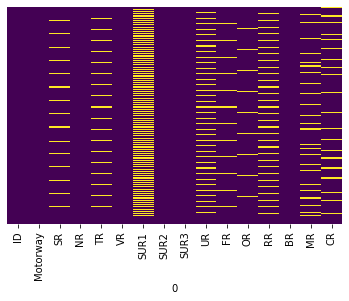

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

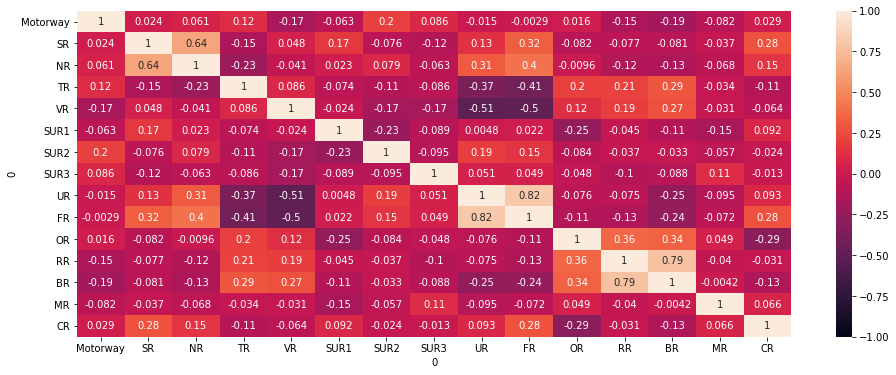

In [33]:
data_copy = df.copy()

data_copy['Motorway'] = data_copy['Motorway'].replace('A1', 1)
data_copy['Motorway'] = data_copy['Motorway'].replace('S52', 2)
data_copy = data_copy.apply(pd.to_numeric) 
data_copy = data_copy.drop(['ID'],axis=1)
plt.figure(figsize=(16, 6))
ax = sns.heatmap(data_copy.corr(),vmin=-1,vmax=1, annot=True)

In [228]:
df['CR'].value_counts()

1    170
2      6
Name: CR, dtype: int64

In [34]:
df['OR'].value_counts()

100    137
75      22
50      19
25       6
99       2
80       1
Name: OR, dtype: int64